In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename='lab_4_Ribberink_Deere_Macadam_Ng_Schmidt_Ayem_Lab4.csv'
headers=['time','batV','waterT','airT','calibrate']
dtypes = ['datetime', 'float','float','float','float']
df = pd.read_csv(filename,names=headers, usecols = [0,2,3,4,5],header=3)
df.purpleV=(df.calibrate/1000)

c:\users\pearl\miniconda3\envs\e350\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [3]:
df.head()

,time,batV,waterT,airT,calibrate
0,2020-01-31 11:44:43.1,13.17,23.11,23.96,0.03
1,2020-01-31 11:44:43.2,13.18,23.11,23.95,0.03
2,2020-01-31 11:44:43.3,13.17,23.12,23.97,0.03
3,2020-01-31 11:44:43.4,13.17,23.12,23.97,0.03
4,2020-01-31 11:44:43.5,13.17,23.11,23.96,0.03


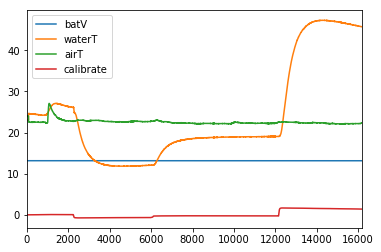

In [4]:
df.plot()

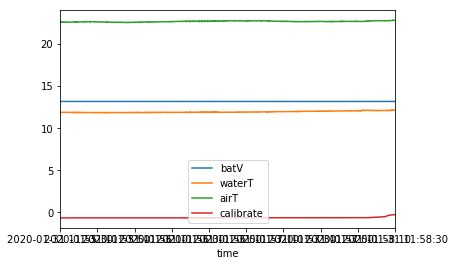

In [9]:
df = df.set_index('time')
time_cold = df['2020-01-31 11:55:30': '2020-01-31 11:58:30']
time_cold.plot()